### List of questions:
- Who were the passengers? (Ages, Gender, Class ...)
- What deck were the passengers on and how does that relate to thier class?
- Where did the passengers come from?
- Who was alone and who was with family?
- What factors helped someone survive the sinking?

In [118]:
import pandas as pd
import pandas as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [119]:
# import data from data file
train_df = pd.read_csv(r"C:\Users\lonj7\MyWork\Data\Titanic\train.csv", sep=',')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [120]:
train_df.info()
# Some feature has missed data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [121]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [122]:
train_df.describe(include=['O'])
#train_df.describe(include='all')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


I could know that Age, Embarked and Cabin have missed data.\
I will fill the data later...

### 1. Who were the passengers? (Ages, Gender, Class)

#### Age

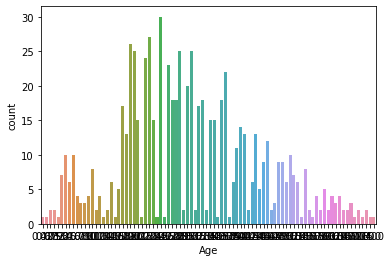

In [123]:
# Let's check distribution of Ages.
sns.countplot("Age", data=train_df)

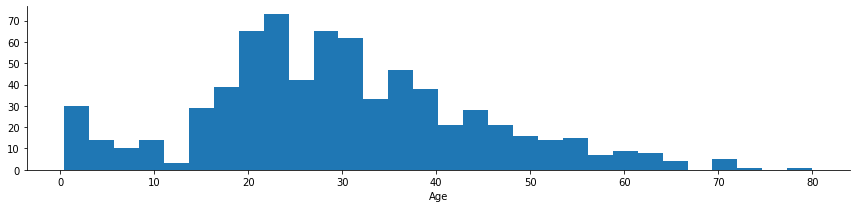

In [124]:
g = sns.FacetGrid(train_df, aspect=4)
g.map(plt.hist, 'Age', bins=30)

In [125]:
# make an age band with 10 years gap.
bins = pd.IntervalIndex.from_tuples([(0, 9), (10, 19), (20, 29),
                                     (30, 39), (40, 49), (50, 59), (60, 69), (70, 79), (80, 89)])
train_df['AgeBand_10'] = pd.cut(train_df['Age'], bins)

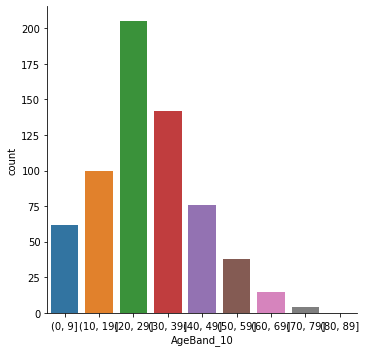

In [126]:
sns.catplot('AgeBand_10', data=train_df, kind='count')

In [127]:
# make an ageband
train_df['AgeBand']=pd.cut(train_df['Age'], 5)
train_df['AgeBand'].value_counts()

(16.336, 32.252]    346
(32.252, 48.168]    188
(0.34, 16.336]      100
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: AgeBand, dtype: int64

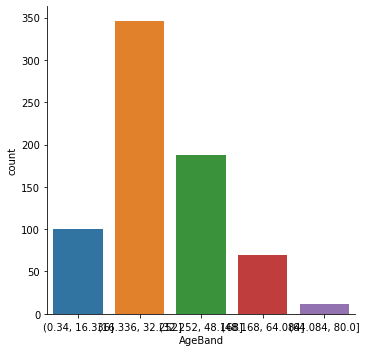

In [128]:
sns.catplot('AgeBand', data=train_df, kind='count')

In [129]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand_10,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20, 29]","(16.336, 32.252]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30, 39]","(32.252, 48.168]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20, 29]","(16.336, 32.252]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30, 39]","(32.252, 48.168]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30, 39]","(32.252, 48.168]"


In [130]:
train_df['Age_10']=train_df['Age'].copy(deep=True)

In [131]:
# replace age data to two features: AgeBand_10, and AgeBand

# AgeBand_10
for num in range(0,9):    
    train_df.loc[(train_df['Age'] >= (num*10)) & (train_df['Age'] < ((num+1)*10)), 'Age_10'] = num

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand_10,AgeBand,Age_10
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20, 29]","(16.336, 32.252]",2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30, 39]","(32.252, 48.168]",3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20, 29]","(16.336, 32.252]",2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30, 39]","(32.252, 48.168]",3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30, 39]","(32.252, 48.168]",3.0


In [132]:
# AgeBand
train_df.loc[ train_df['Age'] <= 16, 'Age'] = 0
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 32), 'Age'] = 1
train_df.loc[(train_df['Age'] > 32) & (train_df['Age'] <= 48), 'Age'] = 2
train_df.loc[(train_df['Age'] > 48) & (train_df['Age'] <= 64), 'Age'] = 3
train_df.loc[ train_df['Age'] > 64, 'Age'] = 4
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand_10,AgeBand,Age_10
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S,"(20, 29]","(16.336, 32.252]",2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,71.2833,C85,C,"(30, 39]","(32.252, 48.168]",3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20, 29]","(16.336, 32.252]",2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,C123,S,"(30, 39]","(32.252, 48.168]",3.0
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,NaN,S,"(30, 39]","(32.252, 48.168]",3.0


In [135]:
# drop AgeBand_10, AgeBand
train_df.drop(['AgeBand_10', 'AgeBand'], axis=1, inplace=True)

# train_df=train_df.drop(['AgeBabd_10', 'AgeBand'], axis=1)

#### Pclass

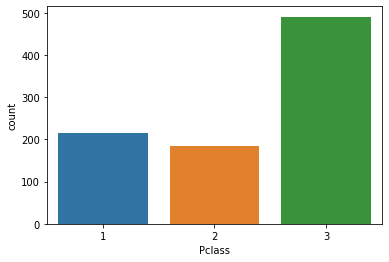

In [136]:
# Let's check the distribution of Pclass
sns.countplot('Pclass', data=train_df)